In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [6]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy')
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy')
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy')

region = 'whole_domain'

In [7]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

# Open preindustrial control info

In [8]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

year_start = 1920
year_end = 2100

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [14]:
latlon_idx = 4
filename_LA = 'member_005_latidx_'+'{:02d}'.format(latlon_indices[latlon_idx,0])+'_lonidx_'+'{:02d}'.format(latlon_indices[latlon_idx,1])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday_'+region+'.npy'

#filename_SF = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[SF_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday.npy'
#filename_LA = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[LA_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday.npy'

working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'
#dict_OD = numpy.load(working_dir + filename_OD).item()
#dict_SF = numpy.load(working_dir + filename_SF).item()

dict_LA = numpy.load(working_dir + filename_LA).item()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/member_005_latidx_13_lonidx_14_years_0402-2200_threshold_0.1mmday_whole_domain.npy'

# Open hist and RCP8.5 info

In [22]:
year_start_hist = 1920 #time_subsets[chunk,0]
year_end_hist = 2010 #time_subsets[chunk,1]

# create season strings
years = numpy.arange(year_start_hist, year_end_hist+1, 1).astype(numpy.int)
half_years_hist = numpy.arange(year_start_hist+0.75, year_end_hist, 1)

season_strings_hist = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_hist = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist=year_end_hist-year_start_hist

In [23]:
year_start_rcp = 1920
year_end_rcp = 2100

# create season strings
years = numpy.arange(year_start_rcp, year_end_rcp+1, 1).astype(numpy.int)
half_years_rcp = numpy.arange(year_start_rcp+0.75, year_end_rcp, 1)

season_strings_rcp = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_rcp=year_end_rcp-year_start_rcp

In [24]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]
print(ensemble_names)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '101', '102', '103', '104', '105']


In [28]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'

dict_OD_list_hist_rcp = []
dict_SF_list_hist_rcp = []
dict_LA_list_hist_rcp = []
for i in range(len(ensemble_names)):
    ensemble_member=ensemble_names[i]
    #member_101_latidx_137_lonidx_191_years_1920-2100_threshold_0.1mmday.npy
    #filename_SF = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    filename_LA = 'member_'+ensemble_member+'_latidx_'+'{:02d}'.format(latlon_indices[latlon_idx,0])+'_lonidx_'+'{:02d}'.format(latlon_indices[latlon_idx,1])+'_years_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday_'+region+'.npy'
    #dict_OD_list_hist_rcp.append(numpy.load(working_dir + filename_OD).item())
    #dict_SF_list_hist_rcp.append(numpy.load(working_dir + filename_SF).item())
    dict_LA_list_hist_rcp.append(numpy.load(working_dir + filename_LA).item())

#print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,1][0]))
#print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,1][0]))
#print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,1][0]))

In [29]:
#print(dict_LA['402-403'].keys())
#dict_keys(['storm_count', 'precipitation_days', 'seasonal_total', 'storm_length_list', 'seasonal_total'])

print(len(dict_LA_list_hist_rcp))
#print(dict_LA_list_hist_rcp[0].keys())

40


# Import seasonal accumulation data

In [30]:
#dict_hist_rcp = dict_OD_list_hist_rcp; dict_pic = dict_OD; location='OD'
#dict_hist_rcp = dict_SF_list_hist_rcp; dict_pic = dict_SF; location='SF'
dict_hist_rcp = dict_LA_list_hist_rcp; dict_pic = dict_LA; location='LA'

seasonal_total_list_hist = []
for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_hist]
    #seasonal_total = numpy.array([item for sublist in seasonal_total for item in sublist])  
    seasonal_total_list_hist.append(seasonal_total)
seasonal_total_hist = numpy.array([item for sublist in seasonal_total_list_hist for item in sublist])

seasonal_total_list_rcp = []
for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_rcp]
    #seasonal_total = numpy.array([item for sublist in seasonal_total for item in sublist])  
    seasonal_total_list_rcp.append(seasonal_total)
seasonal_total_rcp = numpy.array([item for sublist in seasonal_total_list_rcp for item in sublist])

seasonal_total_pic = numpy.array([dict_pic[s]['seasonal_total'] for s in season_strings_pic])
#seasonal_total_pic = numpy.array([item for sublist in seasonal_total_pic for item in sublist])

In [31]:
# in preindustrial control
percentile_list = [50,80,90,95,97,98,99,99.9,99.99,99.999]
values_pic = [numpy.percentile(seasonal_total_pic, i) for i in percentile_list]
n_exceedances_avg_pic = [numpy.sum(seasonal_total_pic>values_pic[i])/((year_end_pic-year_start_pic)/len(ensemble_names)) for i in range(len(values_pic))]
n_events_pic = [numpy.sum(seasonal_total_pic>=values_pic[i]) for i in range(len(values_pic))]

# in historial
percentiles_hist = [scipy.stats.percentileofscore(seasonal_total_hist, i) for i in values_pic]

# in future
percentiles_rcp = [scipy.stats.percentileofscore(seasonal_total_rcp, i) for i in values_pic]

#values_dict = {'percentile_list':percentile_list, 'values_pic':values_pic, 'percentiles_hist':percentiles_hist, 'percentiles_rcp':percentiles_rcp}
#values_df_accumulation = pandas.DataFrame(values_dict)
#values_df_accumulation.head(10)

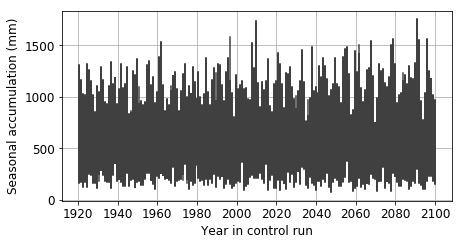

In [32]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

seasonal_total_allseasons = []
for s in range(len(season_strings_rcp)):
    seasonal_total = [dict_hist_rcp[i][season_strings_rcp[s]]['seasonal_total'] for i in range(len(ensemble_names))]
    #seasonal_total = [item for sublist in seasonal_total for item in sublist]
    seasonal_total_allseasons.append(seasonal_total)

fig = mp.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)
for t in range(half_years_rcp.size):
    ax.plot([half_years_rcp[t]]*len(seasonal_total_allseasons[t]), seasonal_total_allseasons[t], color='0.25')

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
#ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
#ax.set_xlim(300,2300)
ax.set_xticks(numpy.arange(1920,2101,20))

ax.grid()
ax.set_axisbelow(True)

In [40]:
# get top and bottom 10th percentiles in PIC
# then see how often it transitions from 1 or 2 seasons with that

lo_perc = 50
hi_perc = 90
pic_lo = numpy.percentile(seasonal_total_pic, lo_perc)
pic_hi = numpy.percentile(seasonal_total_pic, hi_perc)

n_lo_events = 3
whiplash_count_pic = 0
whiplash_hi_seasons = []
whiplash_lo_seasons = []
lo_count = 0

s=0
while s<seasonal_total_pic.size:
    if (seasonal_total_pic[s]<pic_lo):
        lo_count += 1
        s+=1
    elif (seasonal_total_pic[s]>pic_hi)&(lo_count>(n_lo_events-1)):
        whiplash_count_pic += 1
        whiplash_hi_seasons.append(s)
        whiplash_lo_seasons.append([i for i in range((s-n_lo_events),(s))])
        lo_count = 0
        s+=1
    else:
        s+=1
        lo_count=0
        

#flatten this list
whiplash_lo_seasons = [item for sublist in whiplash_lo_seasons for item in sublist]

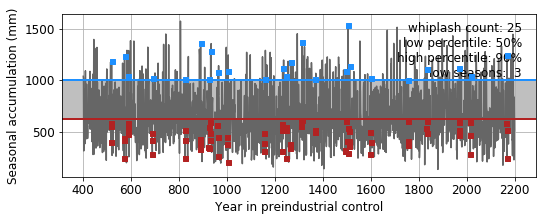

In [41]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

fig = mp.figure(figsize=(8.5,3))
ax = fig.add_subplot(111)

ax.plot(half_years_pic, seasonal_total_pic, color='0.4', zorder=1)

ax.scatter(half_years_pic[whiplash_hi_seasons], seasonal_total_pic[whiplash_hi_seasons], marker='s', c='dodgerblue', s=25, zorder=2)
ax.scatter(half_years_pic[whiplash_lo_seasons], seasonal_total_pic[whiplash_lo_seasons], marker='s', c='firebrick', s=25, zorder=2)

ax.tick_params(labelsize=fontsize)
ax.set_xticks([400,600,800,1000,1200,1400,1600,1800,2000,2200])
#ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_xlabel('Year in preindustrial control', fontsize=fontsize)

ax.axhline(pic_hi, lw=2, zorder=1, color='dodgerblue')
ax.axhline(pic_lo, lw=2, zorder=1, color='firebrick')

ax.text(s='whiplash count: '+str(whiplash_count_pic)+\
        '\nlow percentile: '+str(lo_perc)+\
        '%\nhigh percentile: '+str(hi_perc)+'%'+\
        '\nlow seasons:  '+str(n_lo_events), x=0.97, y=0.95, ha='right', va='top', fontsize=fontsize, transform=ax.transAxes, zorder=1)

ax.axhspan(pic_lo, pic_hi, color='0.75', zorder=0)
ax.grid()
ax.set_axisbelow(True)

#mp.savefig('./figs/all_preindustrial_seasonal_accumulations_threshold_WHIPLASH_'+str(threshold)+'_mmday_loperc_'+'{:.0f}'.format(lo_perc)+'_hiperc_'+'{:.0f}'.format(hi_perc)+'_dryseasons_'+str(n_lo_events)+'_'+location+'.pdf', transparent=True, bbox_inches='tight')

In [42]:
# import all rcp data NOT BUNCHED TOGETHER but separately as each ensemble member
seasonal_total_separate_ensembles = []

for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_rcp]
    #seasonal_total = [item for sublist in seasonal_total for item in sublist]
    seasonal_total_separate_ensembles.append(numpy.array(seasonal_total))

In [43]:
# get top and bottom 10th percentiles in PIC
# then see how often it transitions from 1 or 2 seasons with that

whiplash_count = 0
whiplash_hi_seasons = []
whiplash_lo_seasons = []
lo_count = 0
whiplash_lo_seasons_ens = []
whiplash_hi_seasons_ens = []

for i in range(len(ensemble_names)):
    s=0
    while s<len(season_strings_rcp):
        if (seasonal_total_separate_ensembles[i][s]<pic_lo):
            lo_count += 1
            s+=1
        elif (seasonal_total_separate_ensembles[i][s]>pic_hi)&(lo_count>(n_lo_events-1)):
            whiplash_count += 1
            whiplash_hi_seasons.append(s)
            whiplash_lo_seasons.append([i for i in range((s-n_lo_events),(s))])
            lo_count = 0
            s+=1
        else:
            s+=1
            lo_count=0

    whiplash_lo_seasons = [item for sublist in whiplash_lo_seasons for item in sublist]
    whiplash_lo_seasons_ens.append(whiplash_lo_seasons)
    whiplash_hi_seasons_ens.append(whiplash_hi_seasons)
    
    whiplash_hi_seasons = []
    whiplash_lo_seasons = []

#whiplash_lo_seasons_ens = [item for sublist in whiplash_lo_seasons_ens for item in sublist]

print(whiplash_lo_seasons_ens[0])
print(whiplash_hi_seasons_ens[0])

print(len(whiplash_hi_seasons_ens))
print(len(whiplash_lo_seasons_ens))

[43, 44, 45, 154, 155, 156]
[46, 157]
40
40


"\n\n\nax.scatter(half_years_pic[whiplash_hi_seasons], seasonal_total_pic[whiplash_hi_seasons], marker='s', c='dodgerblue', s=25, zorder=2)\nax.scatter(half_years_pic[whiplash_lo_seasons], seasonal_total_pic[whiplash_lo_seasons], marker='s', c='firebrick', s=25, zorder=2)\n\nax.tick_params(labelsize=fontsize)\n#ax.set_xlabel('Year in control run', fontsize=fontsize)\nax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)\nax.set_xlabel('Year in preindustrial control', fontsize=fontsize)\n\nax.axhline(pic_hi, lw=2, zorder=1, color='dodgerblue')\nax.axhline(pic_lo, lw=2, zorder=1, color='firebrick')\n\nax.text(s='whiplash count: '+str(whiplash_count)+        '\nlow percentile: '+str(lo_perc)+        '%\nhigh percentile: '+str(hi_perc)+'%'+        '\nlow seasons:  '+str(n_low_events), x=0.97, y=0.95, ha='right', va='top', fontsize=fontsize, transform=ax.transAxes)\n"

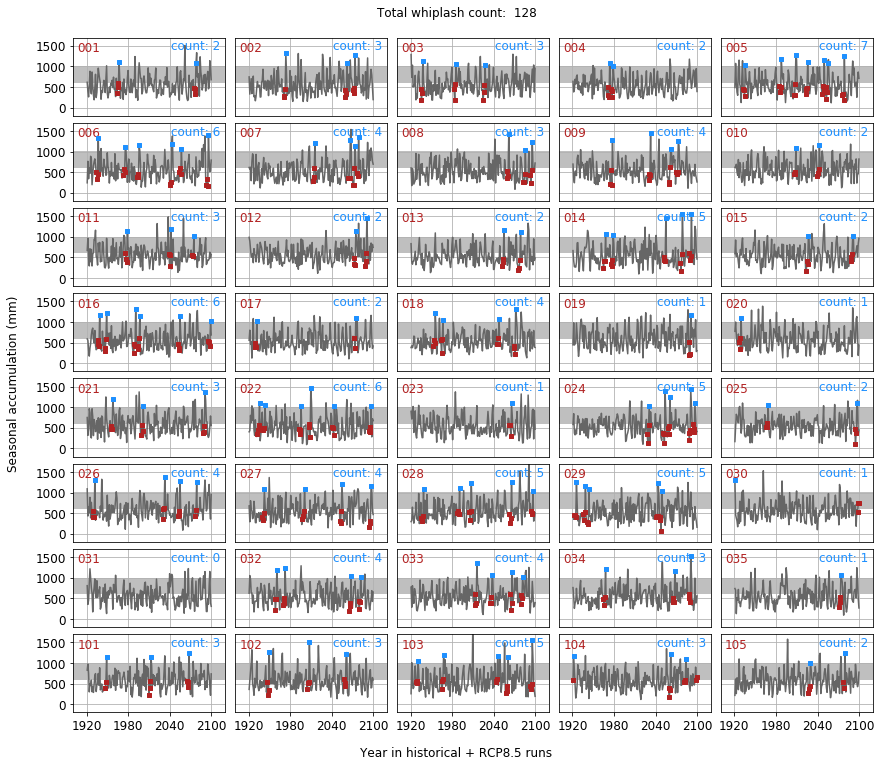

In [44]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

fig = mp.figure(figsize=(12,10))

total_whiplash_count = 0

for i in range(len(ensemble_names)):
    
    ax = fig.add_subplot(8,5,i+1)
    ax.plot(half_years_rcp, seasonal_total_separate_ensembles[i], color='0.4', zorder=2)

    ax.grid()
    ax.tick_params(labelsize=fontsize)
    ax.set_axisbelow(True)
    ax.set_ylim(-200,1700)
    ax.set_yticks([0,500,1000,1500])
    ax.set_xlim(1900,2120)
    ax.set_xticks([1920,1980,2040,2100])
    
    ax.text(s=ensemble_names[i], x=0.03, y=0.95, fontsize=fontsize, ha='left', va='top', transform=ax.transAxes, color='firebrick', zorder=1)
    ax.text(s='count: '+str(len(whiplash_hi_seasons_ens[i])), fontsize=fontsize, ha='right', va='top', x=0.97, y=0.97, transform=ax.transAxes, color='dodgerblue', zorder=1)
    total_whiplash_count += len(whiplash_hi_seasons_ens[i])
    
    ax.scatter(half_years_rcp[whiplash_hi_seasons_ens[i]], seasonal_total_separate_ensembles[i][whiplash_hi_seasons_ens[i]], marker='s', c='dodgerblue', s=10, zorder=3)
    ax.scatter(half_years_rcp[whiplash_lo_seasons_ens[i]], seasonal_total_separate_ensembles[i][whiplash_lo_seasons_ens[i]], marker='s', c='firebrick', s=10, zorder=3)

    ax.axhspan(pic_lo, pic_hi, color='0.75', zorder=0)
    
    if i in [0,5,10,15,20,25,30]:
        ax.xaxis.set_ticklabels([])
        ax.tick_params('x', length=0)
        #ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    elif i in [36,37,38,39]:
        ax.yaxis.set_ticklabels([])
        ax.tick_params('y', length=0)
    elif i==35:
        pass
    else:
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.tick_params('x', length=0)
        ax.tick_params('y', length=0)
    
fig.text(s='Year in historical + RCP8.5 runs', x=0.5, y=-0.005, fontsize=fontsize, ha='center', va='top')
fig.text(s='Seasonal accumulation (mm)', x=-0.005, y=0.5, fontsize=fontsize, ha='right', va='center', rotation=90)
fig.text(s='Total whiplash count:  '+str(total_whiplash_count), x=0.5, y=1.005, fontsize=fontsize, ha='center', va='bottom')

fig.tight_layout(w_pad=0, h_pad=0)


"""


ax.scatter(half_years_pic[whiplash_hi_seasons], seasonal_total_pic[whiplash_hi_seasons], marker='s', c='dodgerblue', s=25, zorder=2)
ax.scatter(half_years_pic[whiplash_lo_seasons], seasonal_total_pic[whiplash_lo_seasons], marker='s', c='firebrick', s=25, zorder=2)

ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_xlabel('Year in preindustrial control', fontsize=fontsize)

ax.axhline(pic_hi, lw=2, zorder=1, color='dodgerblue')
ax.axhline(pic_lo, lw=2, zorder=1, color='firebrick')

ax.text(s='whiplash count: '+str(whiplash_count)+\
        '\nlow percentile: '+str(lo_perc)+\
        '%\nhigh percentile: '+str(hi_perc)+'%'+\
        '\nlow seasons:  '+str(n_low_events), x=0.97, y=0.95, ha='right', va='top', fontsize=fontsize, transform=ax.transAxes)
"""

#fig.savefig('./figs/all_hist_rcp_seasonal_accumulations_threshold_WHIPLASH_'+str(threshold)+'_mmday_loperc_'+'{:.0f}'.format(lo_perc)+'_hiperc_'+'{:.0f}'.format(hi_perc)+'_dryseasons_'+str(n_lo_events)+'_'+location+'.pdf', transparent=True, bbox_inches='tight')

In [422]:
# times per century for PREINDUSTRIAL whiplash event
pic_freq = (whiplash_count_pic/1798)*100

In [423]:
# times per century for RCP8.5-like warming
rcp_freq = (total_whiplash_count/(len(ensemble_names)*(2100-1920)))*100

In [424]:
print(pic_freq, rcp_freq)
rcp_freq/pic_freq

0.5005561735261401 0.7777777777777778


1.5538271604938272